# Problema - Identificando a qualidade dos vinhos verdes

![wine](https://jamestownarts.com/wp-content/uploads/2018/01/red-white-wine-120111.jpg)

> O presente problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem
variantes de vinho branco e tinto. Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis. As variáveis presentes são:

> 1.        Acidez fixa: quantidade de ácidos envolvidos no vinho que são fixos ou não voláteis.
> 2.        Acidez volátil: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um sabor desagradável.
> 3.        Ácido cítrico: encontrado em pequenas quantidades, o ácido cítrico pode adicionar 'frescura' e sabor aos vinhos
> 4.        Açúcar residual: a quantidade de açúcar restante após a fermentação. É raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces.
> 5.        Cloretos: a quantidade de sal no vinho
> 6.        Dióxido de enxofre livre: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como um gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho.
> 7.        Dióxido de enxofre total: quantidade de formas livres e ligadas de S02; em baixas concentrações, o SO2 é principalmente indetectável no vinho, mas em concentrações livres de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
> 8.        Densidade: a densidade é próxima a da água, dependendo da porcentagem de álcool e açúcar.
> 9.        pH: descreve como um vinho é ácido ou básico em uma escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos tem entre 3-4 na escala de pH.
> 10.        Sulfatos: aditivo para vinho que pode contribuir para os níveis de gás dióxido de enxofre (S02), que atua como antimicrobiano e antioxidante.
> 11.        Álcool: o percentual de teor alcoólico do vinho

## 1. LIMPEZA DE DADOS

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('winequality.csv',sep=";")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


> A primeira etapa diz respeito a limpeza dos dados. Primeiramente vamos renomear as colunas para facilitar a leitura dos dados e vamos tentar identificar outliers nesse banco de dados.

In [3]:
df.alcohol.unique()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [4]:
for i in df["alcohol"]:
    try:
        float(i)
    except:
        df = df[df.alcohol != i]
df['alcohol'] = df['alcohol'].astype(float)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,10.489083,5.817098
std,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,1.192961,0.874125
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


> Podemos perceber que a coluna de álcool não está apresentada. Isso provavelmente significa que temos outliers e valores que não estão identificados como floats. Para checar se isso é real, continuamos a análise.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 706.2+ KB


> Como esperado, devemos ter outliers na coluna álcool. Vamos remover esses outliers e verificar se temos valores nulos.

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> OK! Agora vamos transformar o tipo de vinho em uma variável dummy.

In [8]:
wine_type = pd.get_dummies(df['type'])
wine = df.join(wine_type)
wine_type = wine.drop(["type"], axis=1)

In [9]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [10]:
wine.rename(columns = {"fixed acidity": "Acidez fixa", 
                   "volatile acidity":"Volatilidade da acidez",
                   "citric acid":"Ácido cítrico",
                   "residual sugar":"Acucar residual",
                   "chlorides":"Cloretos",
                   "free sulfur dioxide":"Dióxido de enxofre livre",
                   "total sulfur dioxide":"Dioxido de enxofre total",
                   "density":"Densidade",
                   "pH":"pH",
                   "sulphates":"Sulfatos",
                   "alcohol":"Alcool",
                   "quality":"Qualidade",
                   "Red":"Tinto",
                   "White":"Branco"}, 
                                 inplace = True) 

In [11]:
wine.head()

,type,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Acucar residual,Cloretos,Dióxido de enxofre livre,Dioxido de enxofre total,Densidade,pH,Sulfatos,Alcool,Qualidade,Tinto,Branco
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


> Agora precisamos analisar se temos muitos outliers.

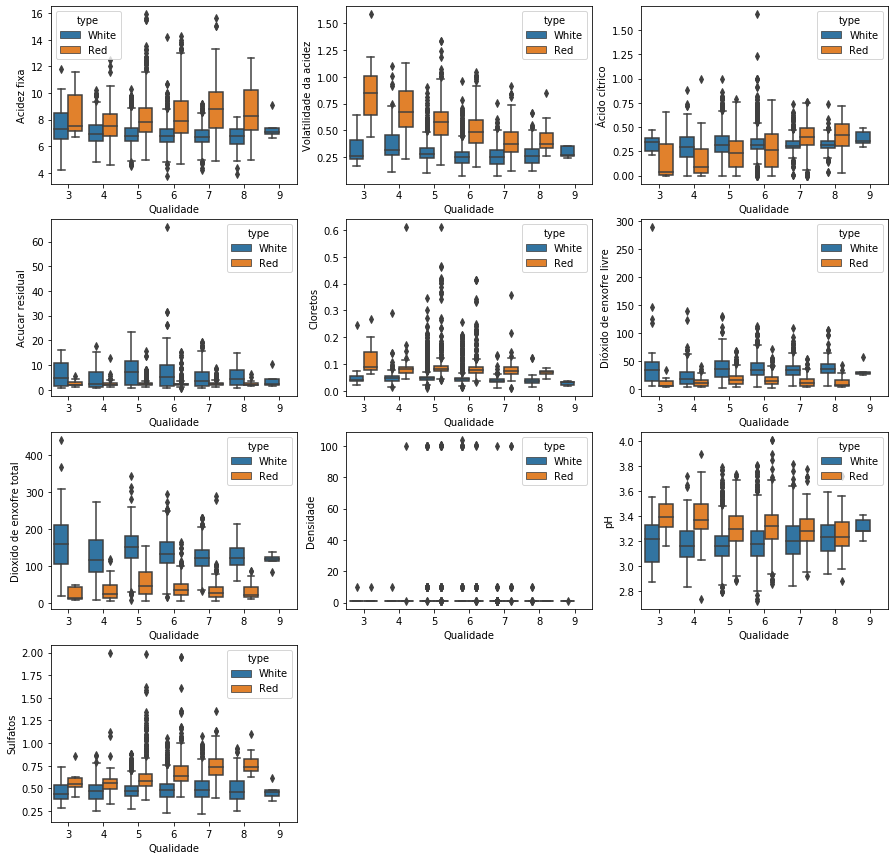

In [12]:
fig = plt.figure(figsize=(15,15))

axs = []
axs.append(fig.add_subplot(4,3,1))
axs.append(fig.add_subplot(4,3,2))
axs.append(fig.add_subplot(4,3,3))
axs.append(fig.add_subplot(4,3,4))
axs.append(fig.add_subplot(4,3,5))
axs.append(fig.add_subplot(4,3,6))
axs.append(fig.add_subplot(4,3,7))
axs.append(fig.add_subplot(4,3,8))
axs.append(fig.add_subplot(4,3,9))
axs.append(fig.add_subplot(4,3,10))

for col, ax in zip(wine.select_dtypes(include="float64").columns, axs):
    sns.boxplot(x='Qualidade', 
                y=col,
                hue = 'type',
                data=wine,
                ax=ax)

plt.show()

> Percebe-se que temos muitos valores que estão fora do esperado. Vamos usar o score-Z para identificar os outliers. Este score padrão, é uma maneira de descrever um dado em termos de sua relação com a média e o desvio padrão de um grupo de pontos. Obter uma pontuação Z é simplesmente mapear os dados em uma distribuição cuja média é definida como 0 e cujo desvio padrão é definido como 1.

> O objetivo de obter scores Z é remover os efeitos do local e da escala dos dados, permitindo comparar diferentes conjuntos de dados diretamente. A intuição por trás do método Z-score de detecção de valores extremos é que, uma vez centrado e redimensionado, qualquer coisa que esteja muito longe de zero (o limiar é geralmente um Z-score de 3 ou -3) deve ser considerada um outlier.

In [13]:
outlier = wine.drop(["Tinto"], axis=1)
outlier = outlier.drop(["Branco"], axis=1)
outlier = outlier.drop(["Qualidade"], axis=1)
outlier = outlier.drop(["type"], axis=1)
infos = wine.filter(['Qualidade','Tinto','Branco','type'], axis=1)
outlier.head()

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Acucar residual,Cloretos,Dióxido de enxofre livre,Dioxido de enxofre total,Densidade,pH,Sulfatos,Alcool
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(outlier))
threshold = 3.5
print(z)

[[0.16950362 0.42315643 0.28320621 ... 1.35912609 0.54527776 1.41598457]
 [0.71012347 0.24098145 0.1457438  ... 0.50616361 0.27656634 0.82916373]
 [0.68004186 0.36243144 0.55813104 ... 0.25745832 0.61245561 0.32617444]
 ...
 [0.71012347 1.03424341 1.29761155 ... 1.25227949 1.47005784 0.42830949]
 [1.0190491  1.85403082 1.36634276 ... 2.18492435 1.20134643 0.24234289]
 [0.94181769 0.18025646 1.03924949 ... 1.06575052 0.86545716 0.42830949]]


In [15]:
outlier =outlier[(z < 3.4).all(axis=1)]
outlier.shape

(6120, 11)

> Temos agora então 5954 dados ao invés de 6457 (503 valores). Ou seja, menos de 8%, o que é um valor razoável para ser removido do banco de dados e, desta forma, melhorar os nossos modelos posteriormente.

In [16]:
outlier.describe()

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Acucar residual,Cloretos,Dióxido de enxofre livre,Dioxido de enxofre total,Densidade,pH,Sulfatos,Alcool
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000
mean,7.125792,0.330525,0.313922,5.464992,0.052570,30.569526,116.992810,1.090188,3.219691,0.522021,10.507265
std,1.106809,0.151289,0.136638,4.640899,0.022748,16.602402,55.016155,0.923755,0.157019,0.130817,1.196479
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.220000,0.250000,1.800000,0.038000,17.000000,82.000000,0.992200,3.110000,0.430000,9.500000
50%,6.900000,0.290000,0.310000,3.175000,0.047000,29.000000,119.000000,0.994785,3.210000,0.500000,10.300000
75%,7.600000,0.390000,0.390000,8.200000,0.061000,41.000000,156.000000,0.996800,3.320000,0.590000,11.300000
max,11.600000,0.895000,0.810000,20.800000,0.175000,89.000000,303.000000,10.026000,3.760000,1.030000,14.200000


In [17]:
wine_clean = outlier.join(infos)

> Agora temos um banco de dados limpo com todas as informações que precisamos.

In [18]:
wine_clean.head()

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Acucar residual,Cloretos,Dióxido de enxofre livre,Dioxido de enxofre total,Densidade,pH,Sulfatos,Alcool,Qualidade,Tinto,Branco,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,White


## 2. ANÁLISE EXPLORATÓRIA

In [19]:
wine_correlation = outlier.join(wine_clean.type)

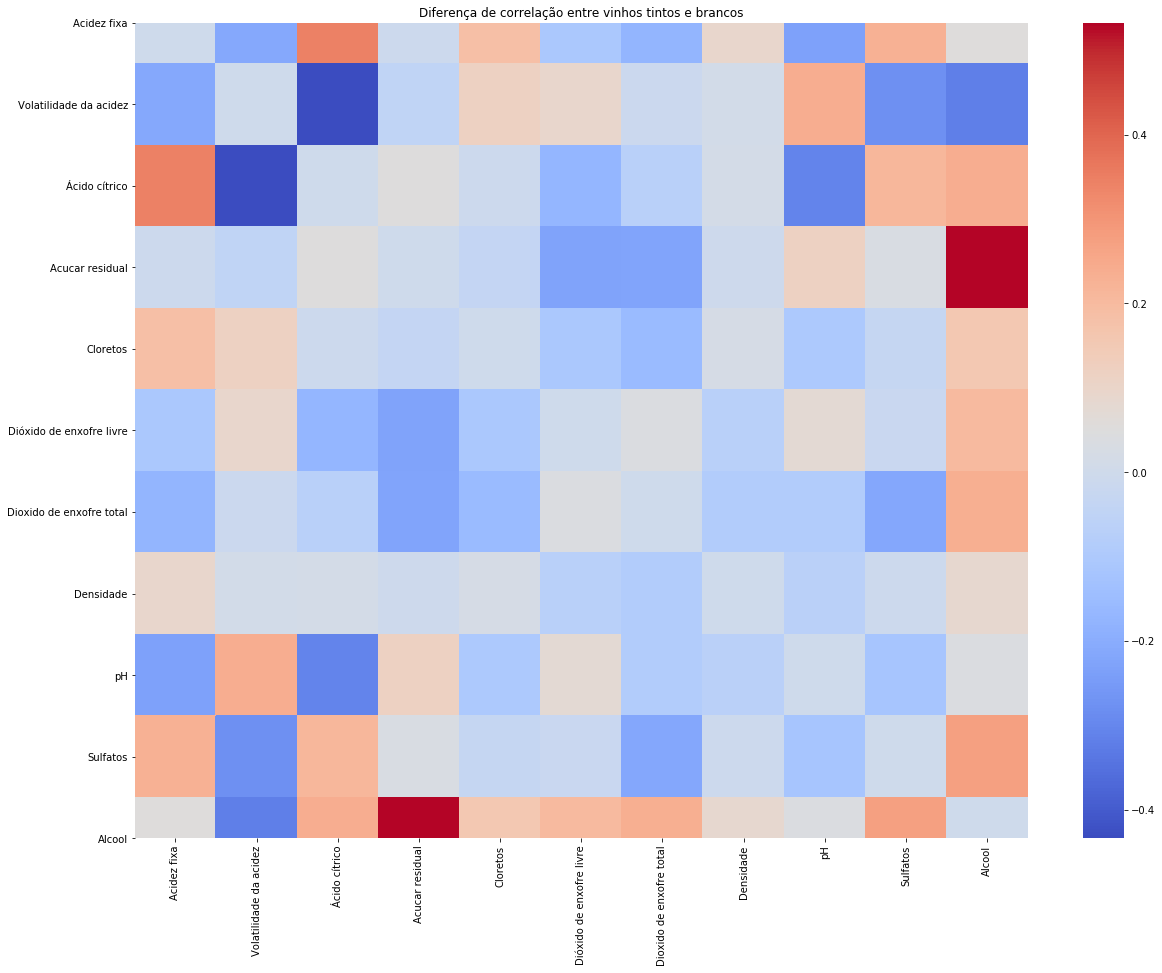

In [20]:

df_white = wine_correlation[wine_correlation.type == "White"]
df_red = wine_correlation[wine_correlation.type == "Red"]



df_r_corr=df_red.corr()
df_w_corr=df_white.corr()
diff_corr = df_r_corr - df_w_corr

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Diferença de correlação entre vinhos tintos e brancos")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

> Existem algumas diferenças notáveis na maneira como certas variáveis interagem dependendo da variedade de vinho. Quanto mais escuro o quadrado, maior a diferença de interação entre os vinhos tinto e branco.

> Por exemplo, a correlação entre o teor de álcool e açúcar é muito mais alta para os vinhos tintos do que para os brancos (os tintos alcoolicos têm mais açúcar que os tintos menos alcoolicos, enquanto os brancos alcoolicos têm menos açúcar que os brancos menos alcoolicos). Uma inspeção mais detalhada indica que a correlação entre açúcar e álcool é positiva para os vinhos tintos (fraco positivo, 0.042), mas é muito mais fortemente negativa para os vinhos brancos (-0.45).

> Como estamos tentando descobrir se um vinho é bom ou ruim, por que não adaptar nossa coluna de destino para refletir essa abordagem? Vamos dividir nosso conjunto de dados em 3 classes:
> - Fraco: todos os vinhos com qualidade abaixo de 5.
> - Média: vinhos com qualidades 6 e 7.
> - Excelente: vinhos com qualidade superior a 7.

In [21]:
wine_clean['Categoria'] = np.where(wine_clean.Qualidade > 5, "Regular", "Ruim")
wine_clean['Categoria'] = np.where(wine_clean.Qualidade >= 8, "Bom", wine_clean.Categoria)
wine_clean.head()

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Acucar residual,Cloretos,Dióxido de enxofre livre,Dioxido de enxofre total,Densidade,pH,Sulfatos,Alcool,Qualidade,Tinto,Branco,type,Categoria
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,White,Regular
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,White,Regular
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,White,Regular
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,White,Regular
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,White,Regular


In [22]:
wine_clean['Categoria'].value_counts()

Regular    3722
Ruim       2206
Bom         192
Name: Categoria, dtype: int64

/home/sarinha/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


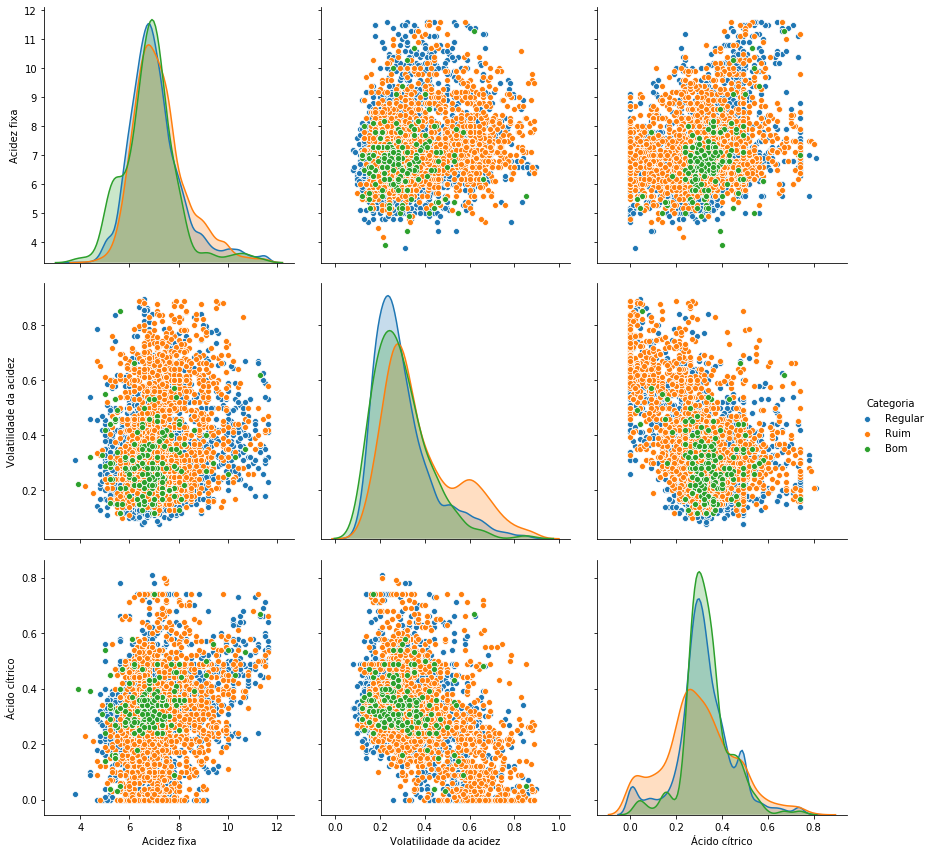

In [23]:
sns.pairplot(data=wine_clean,
             x_vars=list(wine_clean.select_dtypes(include="float64").columns[:3]),
             y_vars=list(wine_clean.select_dtypes(include="float64").columns[:3]),
             hue='Categoria', size=4)
plt.show()

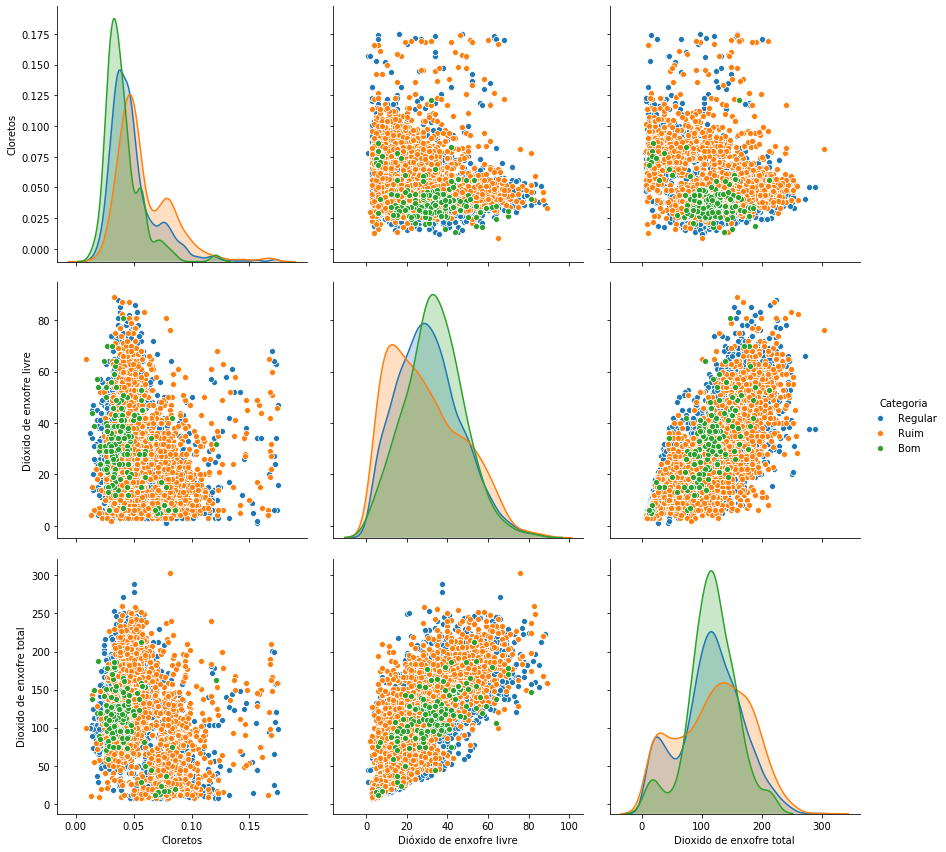

In [24]:
sns.pairplot(data=wine_clean,
             x_vars=list(wine_clean.select_dtypes(include="float64").columns[4:7]),
             y_vars=list(wine_clean.select_dtypes(include="float64").columns[4:7]),
             hue='Categoria', size=4)
plt.show()

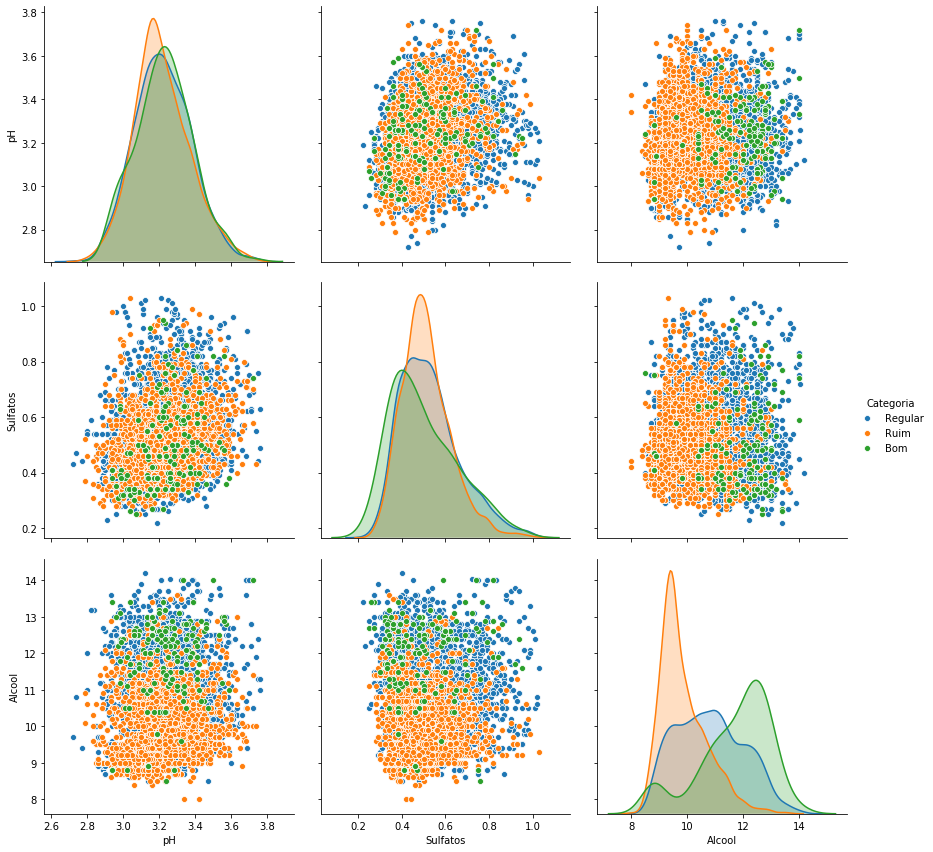

In [25]:
sns.pairplot(data=wine_clean,
             x_vars=list(wine_clean.select_dtypes(include="float64").columns[8:]),
             y_vars=list(wine_clean.select_dtypes(include="float64").columns[8:]),
             hue='Categoria', size=4)
plt.show()

> Desta análise, percebemos que algumas variáveis parecem ser mais importantes do que as outras quando queremos identificar a qualidade. São elas:
- Álcool
- Sulfatos
- pH
- Acidez fixa
- Cloretos

> Percebemos que a acidez desempenha um papel importante na qualidade do vinho. De fato, os ácidos são os principais constituintes do vinho e contribuem muito para o seu sabor. Os vinhos com falta de acidez são "achatados". Quimicamente, os ácidos influenciam a acidez titulável, que afeta o sabor e o pH, que afeta a cor, a estabilidade à oxidação e, conseqüentemente, a vida útil geral de um vinho. Também percebemos que vinhos mais alcoólicos tendem a ser de melhor qualidade.

> Então vamos analisar elas com mais atenção.

### 2.1 Análise de álcool

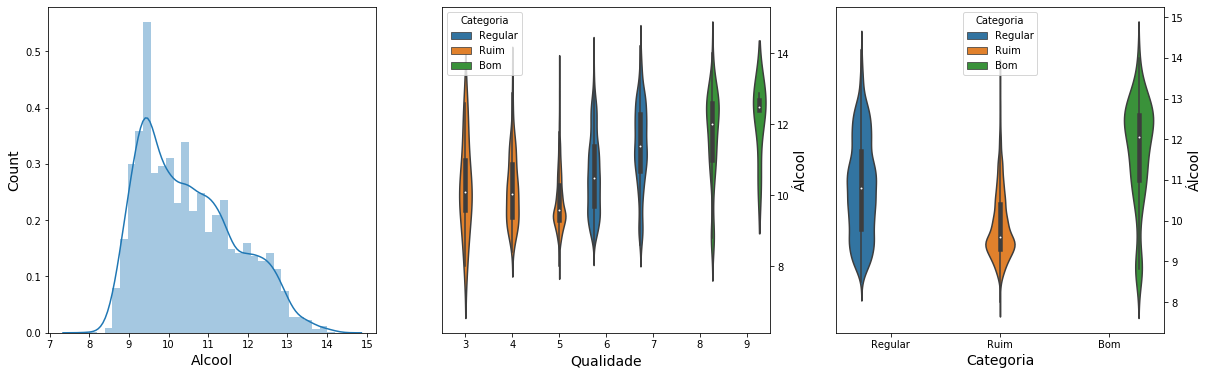

In [26]:
f, axes = plt.subplots(1,3,figsize=(20,6))

sns.distplot(wine_clean['Alcool'], ax = axes[0])
axes[0].set_xlabel('Alcool', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Qualidade', y = 'Alcool', data = wine_clean, hue = 'Categoria',ax = axes[1])
axes[1].set_xlabel('Qualidade', fontsize=14)
axes[1].set_ylabel('Álcool', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

sns.violinplot(x = 'Categoria', y = 'Alcool', data = wine_clean, hue = 'Categoria',ax = axes[2])
axes[2].set_xlabel('Categoria', fontsize=14)
axes[2].set_ylabel('Álcool', fontsize=14)
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

plt.show()

### 2.2 Análise de sulfatos

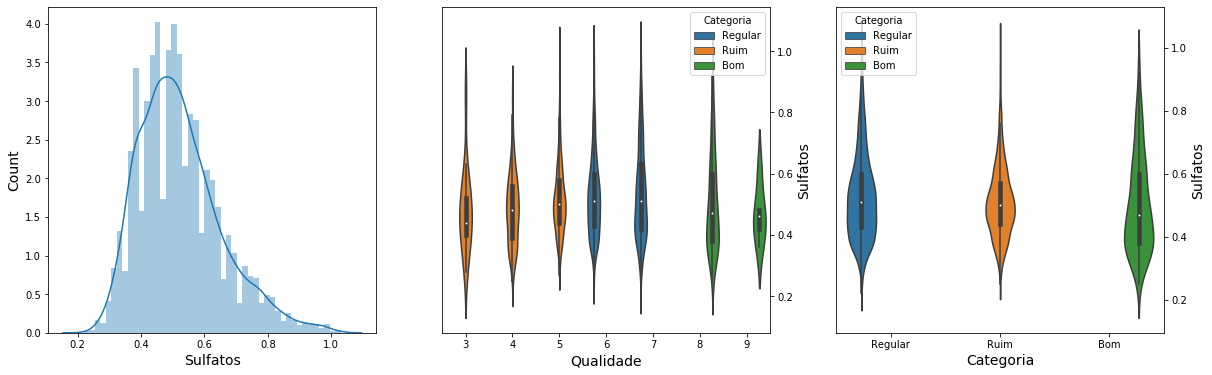

In [27]:
f, axes = plt.subplots(1,3,figsize=(20,6))

sns.distplot(wine_clean['Sulfatos'], ax = axes[0])
axes[0].set_xlabel('Sulfatos', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Qualidade', y = 'Sulfatos', data = wine_clean, hue = 'Categoria',ax = axes[1])
axes[1].set_xlabel('Qualidade', fontsize=14)
axes[1].set_ylabel('Sulfatos', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

sns.violinplot(x = 'Categoria', y = 'Sulfatos', data = wine_clean, hue = 'Categoria',ax = axes[2])
axes[2].set_xlabel('Categoria', fontsize=14)
axes[2].set_ylabel('Sulfatos', fontsize=14)
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

plt.show()

### 2.3 Análise de pH

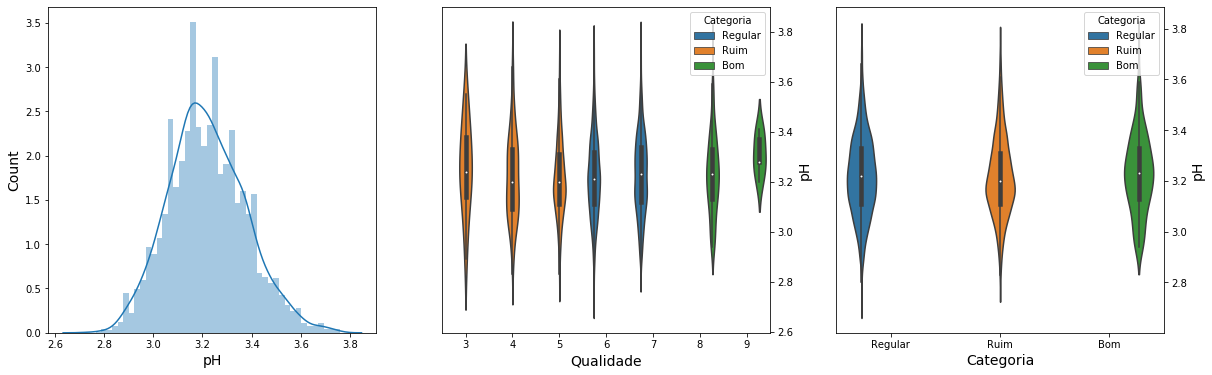

In [28]:
f, axes = plt.subplots(1,3,figsize=(20,6))

sns.distplot(wine_clean['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Qualidade', y = 'pH', data = wine_clean, hue = 'Categoria',ax = axes[1])
axes[1].set_xlabel('Qualidade', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

sns.violinplot(x = 'Categoria', y = 'pH', data = wine_clean, hue = 'Categoria',ax = axes[2])
axes[2].set_xlabel('Categoria', fontsize=14)
axes[2].set_ylabel('pH', fontsize=14)
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

plt.show()

### 2.4 Análise de acidez fixa

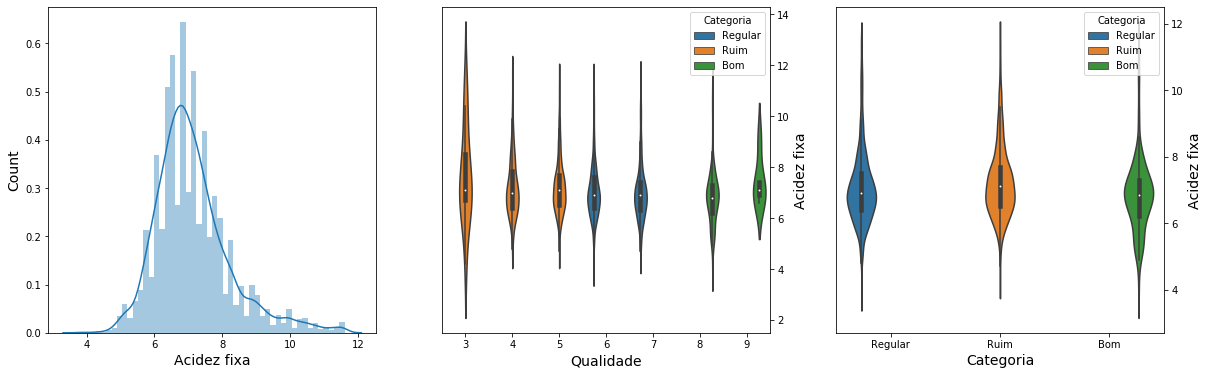

In [29]:
f, axes = plt.subplots(1,3,figsize=(20,6))

sns.distplot(wine_clean['Acidez fixa'], ax = axes[0])
axes[0].set_xlabel('Acidez fixa', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Qualidade', y = 'Acidez fixa', data = wine_clean, hue = 'Categoria',ax = axes[1])
axes[1].set_xlabel('Qualidade', fontsize=14)
axes[1].set_ylabel('Acidez fixa', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

sns.violinplot(x = 'Categoria', y = 'Acidez fixa', data = wine_clean, hue = 'Categoria',ax = axes[2])
axes[2].set_xlabel('Categoria', fontsize=14)
axes[2].set_ylabel('Acidez fixa', fontsize=14)
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

plt.show()

### 2.5 Análise de cloretos

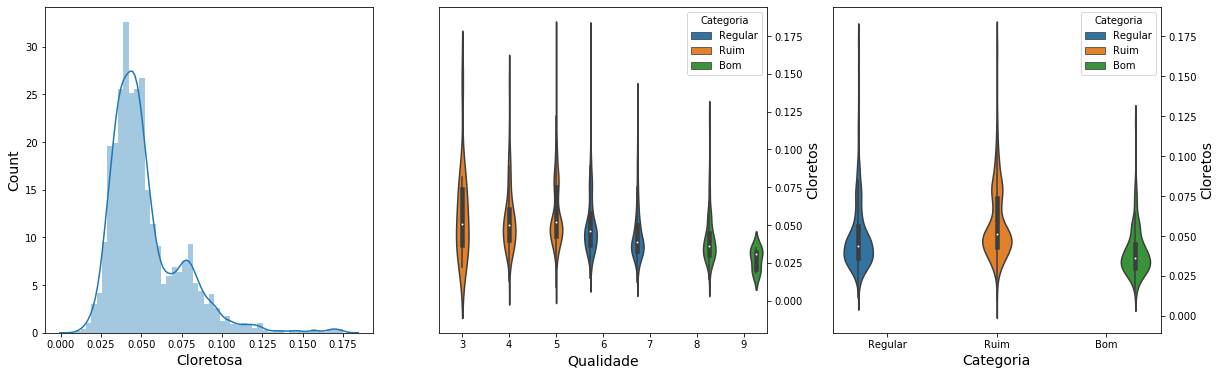

In [30]:
f, axes = plt.subplots(1,3,figsize=(20,6))

sns.distplot(wine_clean['Cloretos'], ax = axes[0])
axes[0].set_xlabel('Cloretosa', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Qualidade', y = 'Cloretos', data = wine_clean, hue = 'Categoria',ax = axes[1])
axes[1].set_xlabel('Qualidade', fontsize=14)
axes[1].set_ylabel('Cloretos', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

sns.violinplot(x = 'Categoria', y = 'Cloretos', data = wine_clean, hue = 'Categoria',ax = axes[2])
axes[2].set_xlabel('Categoria', fontsize=14)
axes[2].set_ylabel('Cloretos', fontsize=14)
axes[2].yaxis.set_label_position("right")
axes[2].yaxis.tick_right()

plt.show()

## 3. Modelagem

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
wine_clean = wine_clean.drop(["type"], axis=1)

In [32]:
wine_test =  wine_clean.drop(["Categoria"], axis=1)

In [33]:
y = wine_test['Qualidade'].values.reshape(-1,1)
X = wine_test.drop('Qualidade', axis = 1).values
X = wine_test.values

> Agora vamos separar os dados.
> -    20% dos dados serão separados para serem usados como dados de validação dos modelos de predição.
> -    80% dos dados serão utilizados para treinar e testar os modelos de predição.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (4896, 14)
Shape of X_test:  (1224, 14)
Shape of y_train:  (4896, 1)
Shape of y_test (1224, 1)


In [36]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### 3.1 Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

/home/sarinha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

f1 = f1_score(y_test, y_pred_lr_test,average='weighted')
print("F1-score: ", f1)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
print("RMSE: ",rmse_lr)

/home/sarinha/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/sarinha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/sarinha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/sarinha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

CV:  0.8950225532958136
Training set:  0.8974673202614379
Test set:  0.9035947712418301
F1-score:  0.8791347142955659
RMSE:  0.32589745369793455


/home/sarinha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.2 K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='distance')

In [40]:
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

f1 = f1_score(y_test, y_pred_knn_test,average='weighted')
print("F1-score: ", f1)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn_test))
print("RMSE: ",rmse_knn)

/home/sarinha/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CV:  0.9124012128996005
Training set:  1.0
Test set:  0.9191176470588235
F1-score:  0.9068432573286829
RMSE:  0.2928895930645031


/home/sarinha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 3.3 Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=6, max_leaf_nodes=400,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=33, splitter='best')

In [42]:
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

f1 = f1_score(y_test, y_pred_dt_test,average='weighted')
print("F1-score: ", f1)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))
print("RMSE: ",rmse_dt)

CV:  0.9795651473392024
Training set:  1.0
Test set:  0.9738562091503268
F1-score:  0.9727474528278862
RMSE:  0.17619804662364147


/home/sarinha/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


### 3.4 Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 15, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [44]:
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

f1 = f1_score(y_test, y_pred_rf_test,average='weighted')
print("F1-score: ", f1)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
print("RMSE: ",rmse_rf)

/home/sarinha/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CV:  0.9932626304429821
Training set:  0.9997957516339869
Test set:  0.9926470588235294
F1-score:  0.9910234253116929
RMSE:  0.09901475429766743


/home/sarinha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 4. Comparação dos modelos

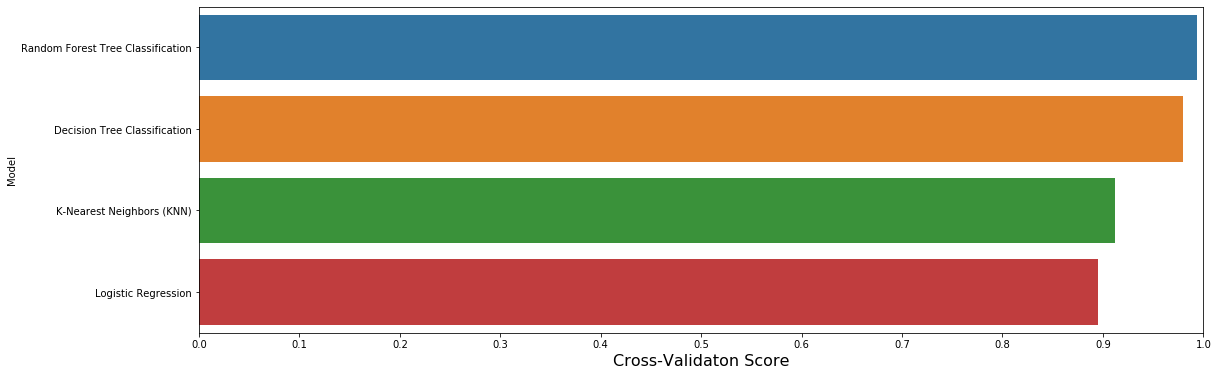

In [45]:
models = [('Logistic Regression',  accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)',  accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('Decision Tree Classification',  accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification',  accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]



predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict



f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()



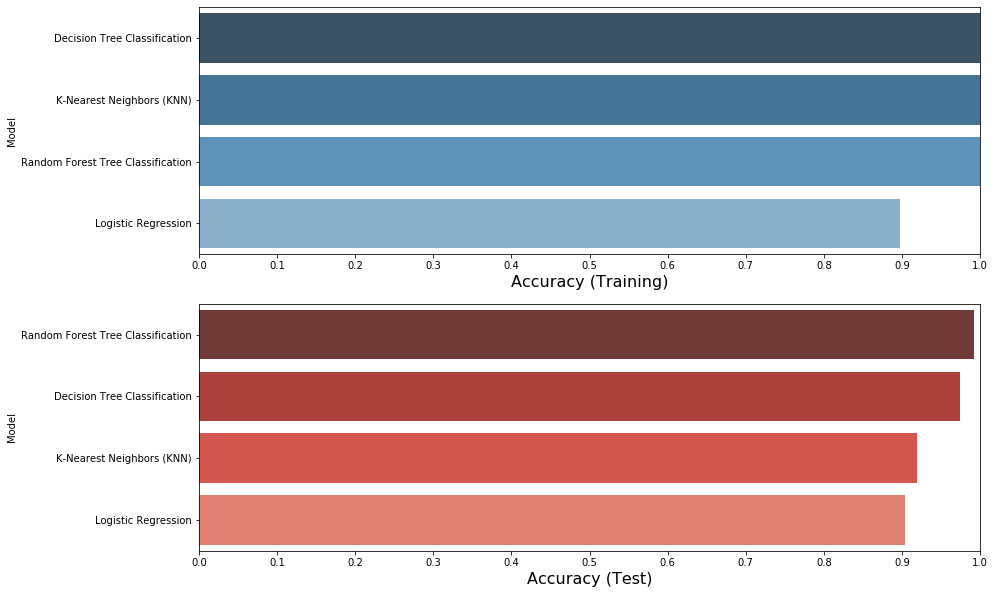

In [46]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [47]:
y_pred_rf_test.shape
dataset = pd.DataFrame({'Qualidade prevista': y_pred_rf_test})
dataset.head()

,Qualidade prevista
0,5
1,7
2,5
3,6
4,7


### 4.1 Importância das features

In [48]:
importance_list = classifier_rf.feature_importances_
print(importance_list[:10])

[0.01057804 0.02399551 0.01866659 0.01357892 0.01566649 0.02016882
 0.01609631 0.01768688 0.01417191 0.01474454]


In [49]:
name_list = wine.columns[:-1]
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
y_pos = np.arange(len(name_list))

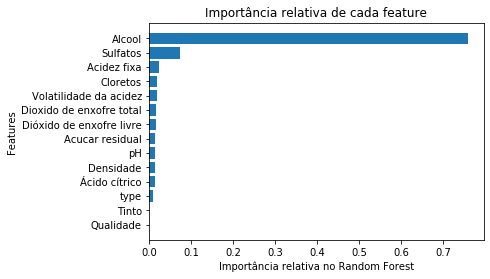

In [50]:
plt.barh(y_pos,importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)

plt.xlabel('Importância relativa no Random Forest')
plt.ylabel('Features')
plt.title('Importância relativa de cada feature')
plt.show()

In [51]:
rmse = [('Logistic Regression',  rmse_lr),
          ('K-Nearest Neighbors (KNN)',  rmse_knn),
          ('Decision Tree Classification',  rmse_dt),
          ('Random Forest Tree Classification',  rmse_rf)
         ]
rmse_df = pd.DataFrame(data = rmse, columns=['Model', 'RMSE'])
rmse_df

,Model,RMSE
0,Logistic Regression,0.325897
1,K-Nearest Neighbors (KNN),0.292890
2,Decision Tree Classification,0.176198
3,Random Forest Tree Classification,0.099015


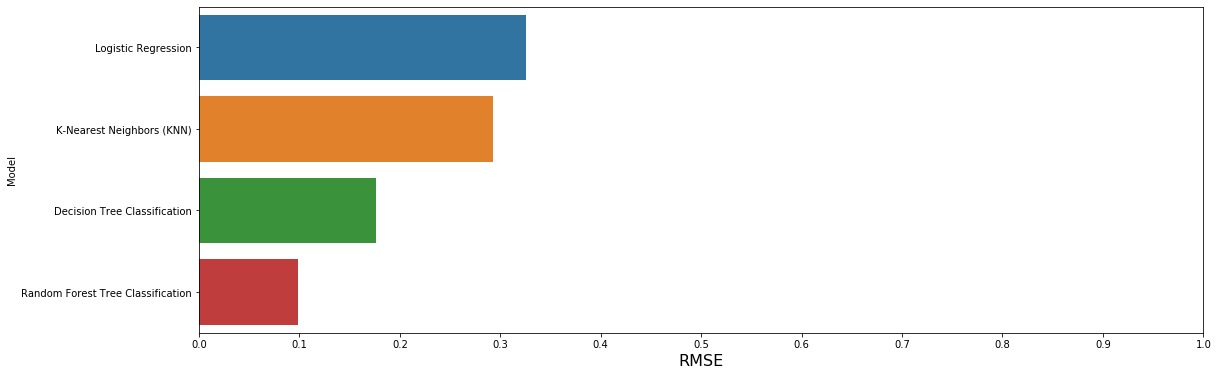

In [52]:
f, axe = plt.subplots(1,1, figsize=(18,6))

rmse_df.sort_values(by=['RMSE'], ascending=False, inplace=True)

sns.barplot(x='RMSE', y='Model', data = rmse_df, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()